# SIR Model

The SIR model is a very basic and yet very powerful model of the spread of infection.  It is the oldest of the so-called "compartmental models" of epidemiology (https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology).

In the SIR model, each individual belongs to one of 3 groups or "compartments":

* Susceptible - `S` - Individuals who are susceptible to infection.
* Infected - `I` - Individuals who are presently infected.
* Recovered - `R` - Individuals who have recovered from infection.

The total population, `N`, is assumed to remain constant: `N = S + I + R`.  Susceptible individuals can transition to infected and infected individuals can transition to recovered.  In the SIR model we assume that recovered individuals cannot become reinfected.

At the onset, we have a small number of infected and the remainder of the population is susceptible.  As the infected encounter the susceptible, they spread the disease and convert some number of susceptible to infected.  This causes susceptible individuals to become infected.  The rate at which this happens, `dS/dt`, is proportional to the number of infected (`I`) times the fraction of the population that is susceptible (`S/N`).  We can express this mathematically as `dS/dt = -Beta*S*I/N` where `Beta` is a proportionality constant (we'll see more on this later).

The rate at which the number of infected changes, `dI/dt`, is the rate at which susceptible individuals become infected minus the rate at which infected individuals recover.  At any time, a fraction of infected individuals recover, hence the rate is proportional to `I`.  The proportionality constant for recovery is called `Gamma` and this is roughly the inverse of the number of days that an individual takes to recover after they are infected.  We express all of this mathematically as `dI/dt = -dS/dt - Gamma*I = Beta*S*I/N - Gamma*I`.

The rate at which the number of recovered changes, `dR/dt`, is equal to the rate at which individuals recover from infection.  That is, `dR/dt = Gamma * I`.  Note that `N = S + I + R` is constant and `dN/dt = dS/dt + dI/dt + dR/dt = 0`.  Because of this, we can focus on `S` and `I` and always calculated `R = N - S - I`.

The value of `Beta` in some sense represents the rate at which infection spreads from infected to susceptible.  Another way to look at it is that `1/Beta` (the inverse of the rate) is roughly the time between encounters between an infected individual and a susceptible individual that spread the disease.

A common parameter to look at in epidemiology is the "basic reproduction number", `R0`.  This is the ratio of the recovery time to the time between spreading encounters, or equivalently the inverse of that - the ratio of the rate of spread to the rate of recovery: `R0 = Beta/Gamma`.  An `R0 > 1` means the disease spreads quickly relative to how quickly individuals recover.

_NOTE_ There are other models that add other compartments.  We'll focus on the SIR model here.  The results we get aren't intended to be quantitatively useful or authoritative, but they are useful for qualitatively comparing the effects of various parameters and as a basis for discussion.

_NOTE_ The SIR model does not module birth and death.  In fact, in the SIR model dead individuals are technically "recovered" since they are no longer infected or susceptible.  A less morbid argument can be made that over the course of an epidemic the birth and death rates are relatively close and thus the changes to `R` and `S` are roughly a wash.

## Simulations

The simulations below show `S`, `I`, and `R` plotted versus time in days based on some rough estimates (from the internet) of `R0` and `Gamma`.  One value I found for `R0` is 2.28.  Other values seem to range between 1.5 and 3.5.  `R0` can be different over time and in different locations as different strategies are implemented to reduce the spread.  I have heard multiple places that the time of recovery is about 14 days, so I picked `Gamma` to be 1/14.  The value of `N` doesn't matter much (everything is proportional), so I chose 327 million - about the population of the US.  In each case we assume that the initial infection is 0.1% of the population.

In [1]:
# simulation set up

%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

R0Base = 2.28      # literature
GammaBase = 1/14   # 14 days recovery time
N = 327000000      # population of the US
tmax = 250         # length of simulation in days

# returns a SIR model for the given R0 and Gamma parameters
def make_sir(R0, Gamma):
    Beta = R0 * Gamma
    return (lambda X, t: [(-Beta*X[0]*X[1]/N), (Beta*X[0]*X[1]/N)-Gamma*X[1]])


Here's the base case

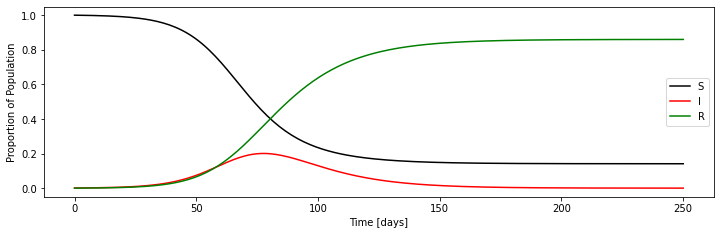

In [2]:
sir = make_sir(R0Base, GammaBase)

tspan = np.linspace(0, tmax, 200)
i0 = 0.001 * N
x0 = [N - i0, i0]
ys = odeint(sir, x0, tspan)

plt.figure(figsize=(12,3.5))
plt.plot(tspan, ys[:, 0]/N, 'k-', tspan, ys[:, 1]/N, 'r-', tspan, 1 - ys[:, 0]/N - ys[:, 1]/N, 'g-')
plt.legend(['S', 'I', 'R'])
plt.xlabel('Time [days]')
plt.ylabel('Proportion of Population')
plt.show()

What if `R0` is effectively cut by 25%?

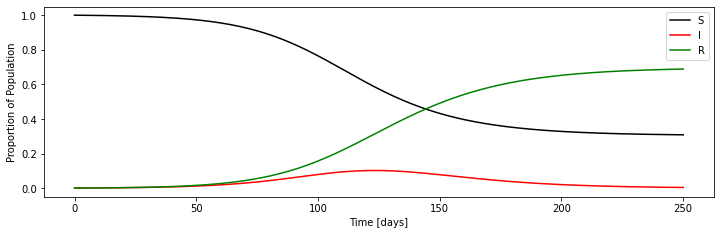

In [3]:
sir = make_sir(R0Base * 0.75, GammaBase)

tspan = np.linspace(0, tmax, 200)
i0 = 0.001 * N
x0 = [N - i0, i0]
ys = odeint(sir, x0, tspan)

plt.figure(figsize=(12,3.5))
plt.plot(tspan, ys[:, 0]/N, 'k-', tspan, ys[:, 1]/N, 'r-', tspan, 1 - ys[:, 0]/N - ys[:, 1]/N, 'g-')
plt.legend(['S', 'I', 'R'])
plt.xlabel('Time [days]')
plt.ylabel('Proportion of Population')
plt.show()

This is the **"flattening the curve"** everyone is talking about.  By reducing the spread of the disease, the number of infected people peaks later and the peak is lower.  This is a VERY GOOD THING because peak is lower, putting hospitals under much less strain.

What if we cut `R0` in half?

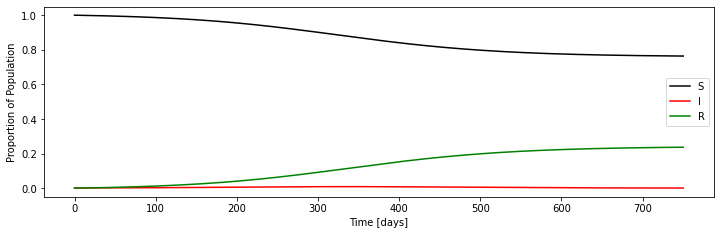

In [4]:
sir = make_sir(R0Base * 0.5, GammaBase)

tspan = np.linspace(0, tmax*3, 200)
i0 = 0.001 * N
x0 = [N - i0, i0]
ys = odeint(sir, x0, tspan)

plt.figure(figsize=(12,3.5))
plt.plot(tspan, ys[:, 0]/N, 'k-', tspan, ys[:, 1]/N, 'r-', tspan, 1 - ys[:, 0]/N - ys[:, 1]/N, 'g-')
plt.legend(['S', 'I', 'R'])
plt.xlabel('Time [days]')
plt.ylabel('Proportion of Population')
plt.show()

It doesn't even have a peak if we run the simulation for 3x as long!

What if `R0` is _worse_?

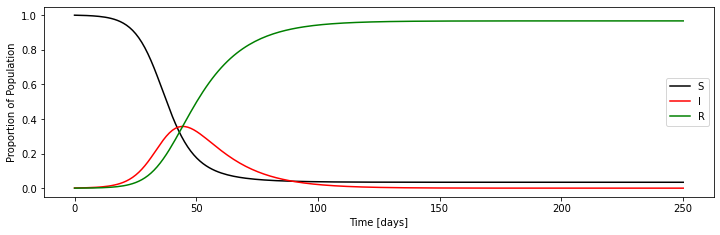

In [5]:
sir = make_sir(3.5, GammaBase)

tspan = np.linspace(0, tmax, 200)
i0 = 0.001 * N
x0 = [N - i0, i0]
ys = odeint(sir, x0, tspan)

plt.figure(figsize=(12,3.5))
plt.plot(tspan, ys[:, 0]/N, 'k-', tspan, ys[:, 1]/N, 'r-', tspan, 1 - ys[:, 0]/N - ys[:, 1]/N, 'g-')
plt.legend(['S', 'I', 'R'])
plt.xlabel('Time [days]')
plt.ylabel('Proportion of Population')
plt.show()

The peak happens earlier and is much worse!

What if `R0` is higher and recovery takes longer (e.g., hospitals get overwhelmed), effectively making `Gamma` lower.

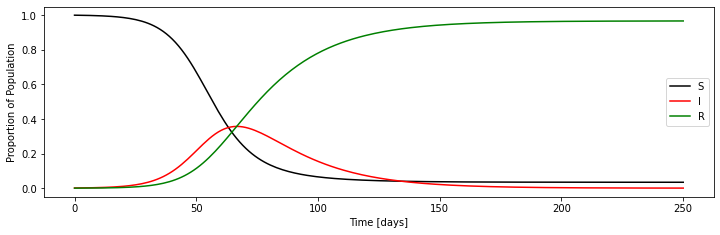

In [6]:
sir = make_sir(3.5, 1/21)

tspan = np.linspace(0, tmax, 200)
i0 = 0.001 * N
x0 = [N - i0, i0]
ys = odeint(sir, x0, tspan)

plt.figure(figsize=(12,3.5))
plt.plot(tspan, ys[:, 0]/N, 'k-', tspan, ys[:, 1]/N, 'r-', tspan, 1 - ys[:, 0]/N - ys[:, 1]/N, 'g-')
plt.legend(['S', 'I', 'R'])
plt.xlabel('Time [days]')
plt.ylabel('Proportion of Population')
plt.show()

The peak is not much higher but is delayed.